<img src="files/matplotlib.png"/>

* Librairie qui permet de réaliser des graphiques
* Relativement simple à prendre en main
* Supporte le Latex
* Contrôle fin sur les paramètres du graphique
* Exportation des graphiques dans plusieurs formats

* C'est la fonction plot du module pyplot de la libraire qui est utilisée pour les graphiques
* Par convention: import matplotlib.pyplot as plt
* Pour avoir les graphiques dans le notebook il faut appeler la commande magique: _%matplotlib inline_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Premier graphique

* Création d'une figure, puis création des axes  
* Dessin de la ou des courbe(s)  
* Paramétrage des axes

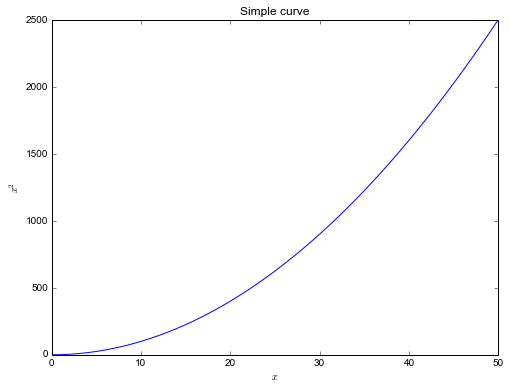

In [7]:
x = np.arange(51)
fig, graph = plt.subplots(figsize=(8, 6))  # renvoie un tuple avec la figure et les axes
graph.plot(x, x**2)
graph.set_xlabel("$x$")
graph.set_ylabel("$x^2$")
graph.set_title("Simple curve")

## Couleur, style de ligne, marqueur, épaisseur de ligne

* color: la couleur
  * Uniquement la première lettre pour les couleurs basiques suivantes: 
    * b: blue
    * g: green
    * r: red
    * c: cyan
    * m: magenta
    * y: yellow
    * k: black
    * w: white
  * Des nuances de gris avec un float compris entre 0 et 1, par exemple: color="0.75"
  * Panel des couleurs html avec le code hexadecimal correspondant, exemple: color="#eeefff"
  * Le code RGB, en passant un tuple avec des valeurs comprises entre 0 et 1, exemple: color=(0.5,0.5,0.5)
* linestyle (ou ls): le style de ligne: '-' | '--' | '-.' | ':' | 'None' | '  ' | ''
* marker: la liste est ici: http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
* linewidth (ou lw): épaisseur de la courbe, un float en points

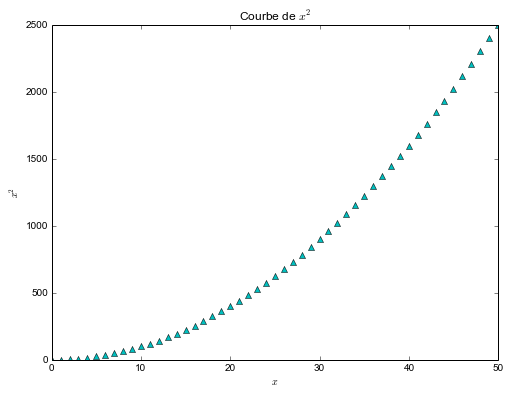

In [9]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.plot(x, x**2, color="c", linestyle="None", marker="^", linewidth=2)
graph.set_ylabel("$x^2$")
graph.set_xlabel("$x$")
graph.set_title("Courbe de $x^2$")

## Plusieurs graphiques dans une seule figure

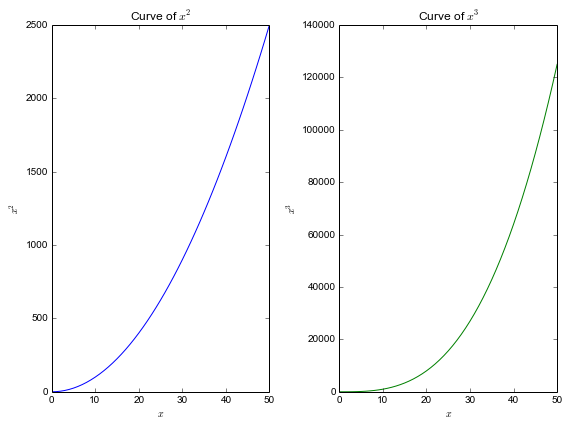

In [13]:
fig = plt.figure(figsize=(8, 6))

graph = fig.add_subplot(1, 2, 1)  # une ligne, deux colonnes, premier graph
graph.plot(x, x**2, color="blue")
graph.set_xlabel("$x$")
graph.set_ylabel("$x^2$")
graph.set_title("Curve of $x^2$")

graph = fig.add_subplot(1, 2, 2)  # une ligne, deux colonnes, deuxième graph
graph.plot(x, x**3, color="green")
graph.set_xlabel("$x$")
graph.set_ylabel("$x^3$")
graph.set_title("Curve of $x^3$")

fig.tight_layout()  # améliore la forme de la figure (espacements ...)

## Plusieurs courbes dans un même graphique

Pour ajouter plusieurs courbes il suffit d'appeler plusieurs fois ax.plot()  

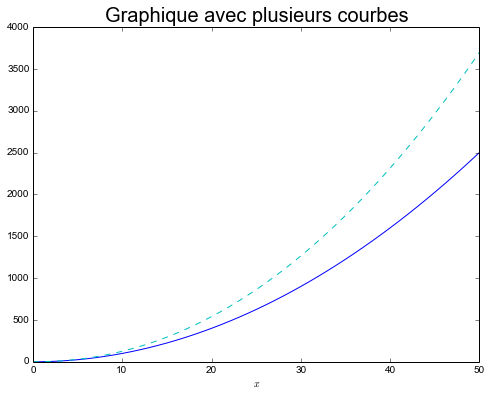

In [14]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.plot(x, x**2, ls="-", color="b", lw=1)
graph.plot(x, x**2.1, ls="--", color="c", lw=1)
graph.set_xlabel("$x$")
graph.set_title("Graphique avec plusieurs courbes", fontsize=20) # ajout de l'option fontsize

## Options pour personnaliser le graphique: legend, xlim, ylim, xticks, yticks

* Pour ajouter une légende, il faut ajouter un label dans l'appel de ax.plot, et ensuite appeler la fonction ax.legend()
* ax.legend accepte plusieurs paramètres optionnels: 
  * la localisation avec le mot clé loc, sachant que: 
    * loc=0 -> matplotlib choisit lui-même le placement
    * loc=1 -> en haut à droite
    * loc=2 -> en haut à gauche
    * loc=3 -> en bas à gauche
    * loc=4 -> en bas à droite
    * 5: right, 6: center left, 7: center right, 8: lower center, 9: upper center, 10: center
  * le nombre de colonnes avec le mot clé ncol
  * frameon=False pour enlever le cadre de la légende
* xlim et ylim permettent de changer les limites des axes
* les ticks sont les marques sur les axes
    * modification avec set_xticks, set_yticks
    * modification des labels de ces ticks avec respectivement set_xticklabels et set_yticklabels

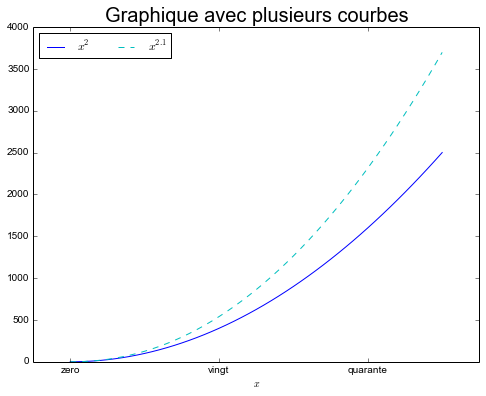

In [16]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.plot(x, x**2, ls="-", color="b", lw=1, label="$x^2$")
graph.plot(x, x**2.1, ls="--", color="c", lw=1, label="$x^{2.1}$")
graph.set_xlabel("$x$")
graph.set_xlim(-5, 55) # définition des limites de l'axe des abscisses
graph.set_xticks(range(0,51,20)) # définition des endroits où mettre les tirets verticaux (ticks)
graph.set_xticklabels(["zero", "vingt", "quarante"]) # on peut changer les labels des ticks
graph.set_title("Graphique avec plusieurs courbes", fontsize=20) # ajout de l'option fontsize
graph.legend(loc=2, ncol=2)

## Enregistrement de la figure

Plusieurs formats d'enregistrement sont possibles: PNG, JPG, EPS, SVG, PGF et PDF

In [55]:
fig.savefig("fig_plusieurs_courbes.png")

# Autres types de graphiques

## Barplot

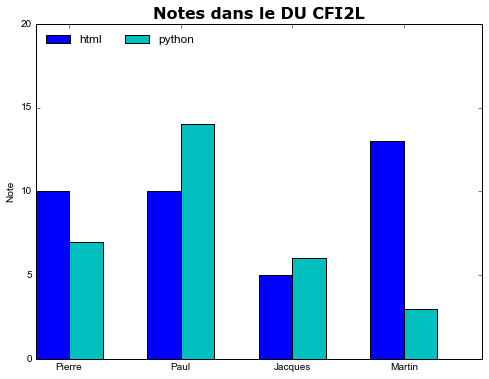

In [17]:
notes_html = np.array([np.random.randint(0, 20) for _ in range(4)])
notes_python = np.array([np.random.randint(0, 20) for _ in range(4)])
etudiants = ["Pierre", "Paul", "Jacques", "Martin"]

fig, graph = plt.subplots(figsize=(8, 6))
graph.set_title("Notes dans le DU CFI2L", fontsize=16, fontweight="bold")
graph.bar(np.arange(4), notes_html, width=0.3, color="b", label="html")
graph.bar(np.arange(4)+0.3, notes_python, width=0.3, color="c", label="python")
graph.set_ylim(0, 20)
graph.set_ylabel("Note")
graph.set_xticks(np.arange(4)+0.3)
graph.set_xticklabels(etudiants)
graph.legend(loc=2, ncol=2, frameon=False)

## Boxplot

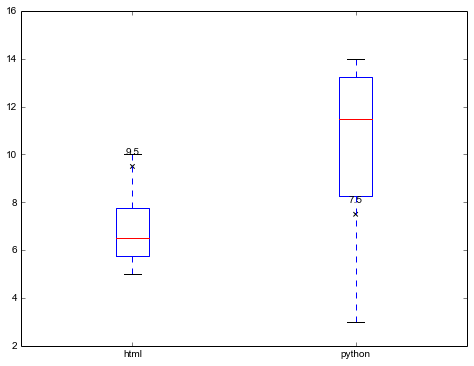

In [18]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.boxplot(np.array([notes_html, notes_python]).reshape(4, 2))
graph.set_xticklabels(["html", "python"])
# on ajoute les moyennes (une marque et la valeur)
moy = [np.mean(notes_html), np.mean(notes_python)]
graph.scatter([1, 2], moy, c="black", marker="x")
graph.text(1, moy[0] + 0.5, moy[0], horizontalalignment='center') 
graph.text(2, moy[1] + 0.5, moy[1], horizontalalignment='center')

## Sources

* http://matplotlib.org/users/pyplot_tutorial.html
* http://matplotlib.org/api/pyplot_summary.html
* http://matplotlib.org/examples/statistics/